In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lxml import html
import requests as req
from locale import *

In [113]:
dat = []
for p in range(1, 112):
    url = "http://apps.ariquemes.ro.gov.br/transparencia/funcionarios?page=%s" % p
    page = req.get(url)
    tree = html.fromstring(page.content)
    raw = tree.xpath("//tr")
    N = len(raw)
    for i in range(1, N):
        r = []
        for it in raw[i]:
            r.append(it.text)
        dat.append(r)

In [114]:
dx = dat
for d in dx:
    if d[6] == None:
        d[6] = 0.0
    else:
        d[6] = float(d[6].replace(".","").replace(",", "."))

In [136]:
df = pd.DataFrame(dx, columns=["empresa", "matricula", "nome", "vinculo", "cargo", "lotacao", "salario"])
df = df[df.salario > 0]

In [137]:
cargos = np.unique(df.cargo)
resul = []
for cargo in cargos:
    resul.append([cargo, len(df[df.cargo == cargo])])

In [138]:
resul

[['ASSESSOR T. ESPECIAL CDS-05-A', 14],
 ['AUXILIAR DE ENFERMAGEM', 1],
 ['Administrador D. de Bom Futuro', 1],
 ['Agente  de Mautencao I', 15],
 ['Agente Administrativo', 1],
 ['Agente Comunitario PACS', 98],
 ['Agente Comunitario de Saude', 2],
 ['Agente Educacional', 1],
 ['Agente Infra - Estrutura I', 25],
 ['Agente Operacional I', 12],
 ['Agente Operacional II', 29],
 ['Agente Operacional de Saude', 9],
 ['Agente de ConservaÃ§Ã£o', 9],
 ['Agente de Gestao Escolar', 40],
 ['Agente de Gestao Publica', 79],
 ['Agente de Infra - Estrutura II', 6],
 ['Agente de Manutencao II', 10],
 ['Agente de Servico Escolar', 324],
 ['Agente de ServiÃ§o', 177],
 ['Agente de Transporte Escolar', 48],
 ['Agente de Vigilancia', 17],
 ['Asses. TÃ©cnico Nivel III', 1],
 ['Assessor Especial I  CDS 08', 1],
 ['Assessor Especial II CDS - 06', 12],
 ['Assessor Especial III CDS - 04', 8],
 ['Assessor Especial IV CDS - 03', 30],
 ['Assessor Especial V CDS - 02', 35],
 ['Assessor Especial VI CDS - 01', 29],
 ['

In [148]:
dfa = df[df.cargo == "Professor 40 Horas"]

(array([   1.,    0.,    0.,    0.,    0.,    0.,    1.,   10.,   42.,
          29.,  103.,   93.,   56.,   36.,   28.,   40.,   34.,   29.,
          15.,   14.,    9.,    2.,    6.,    2.,    1.]),
 array([  189.18  ,   505.1472,   821.1144,  1137.0816,  1453.0488,
         1769.016 ,  2084.9832,  2400.9504,  2716.9176,  3032.8848,
         3348.852 ,  3664.8192,  3980.7864,  4296.7536,  4612.7208,
         4928.688 ,  5244.6552,  5560.6224,  5876.5896,  6192.5568,
         6508.524 ,  6824.4912,  7140.4584,  7456.4256,  7772.3928,  8088.36  ]),
 <a list of 25 Patch objects>)

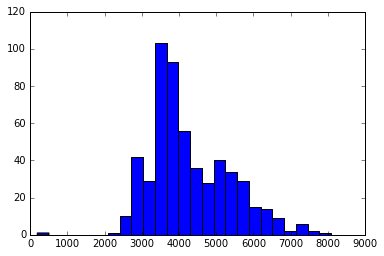

In [150]:
plt.hist(dfa.salario, bins = 25)

In [190]:
N = 1e6
y = np.random.alpha(3,0.5, N)
plt.hist(y, bins = 100)
plt.show()

AttributeError: module 'numpy.random' has no attribute 'alpha'